In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.model_selection import train_test_split
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold
import random
from utils.utils import *

## Loading the data

In [2]:
data_indexes = [(i+1,j+1) for i in range(5) for j in range(2000)]

In [3]:
identify_nan = False
idx_discard = set()

if identify_nan:
    #Identify data with NaN to discard them
    for idx in data_indexes:
        mat = np.loadtxt(f'./datos_tfg/datos_tfg/tfg_datos_{idx[0]}_{idx[1]}.txt')
        if np.isnan(mat[-1]).any():
            idx_discard.add(idx)
    #Save de indexes
    with open('idx_nan.txt', 'w') as f:
        for idx in idx_discard:
            f.write(f"{idx[0]}, {idx[1]}\n")


with open('./utils/idx_nan.txt', 'r') as f:
    for line in f:
        idx = line.strip().split(',')
        idx_discard.add((int(idx[0]), int(idx[1].strip())))

In [4]:
parameters = load_parameter_list()

In [5]:
df_parameters = pd.DataFrame(parameters, columns=['cx', 'cy', 'a', 'b', 'theta', 'e1', 'e2'])
df_parameters['data_index'] = data_indexes
df_parameters = df_parameters[~df_parameters['data_index'].isin(idx_discard)]
df_parameters.reset_index(inplace = True, drop = True)

## Parameters analysis

In [6]:
print(f'There are {len(df_parameters)} combination of parameters.')

There are 7067 combination of parameters.


In [7]:
df_parameters.drop(['data_index'], axis=1).describe().transpose().drop(['25%','75%'], axis=1)

,count,mean,std,min,50%,max
cx,7067.0,0.475365,1.008015,-3.102034,0.471488,4.378377
cy,7067.0,3.524298,0.975501,0.572812,3.496492,6.764944
a,7067.0,1.339595,0.562254,0.015081,1.313752,4.032865
b,7067.0,0.546197,0.388177,0.000054,0.479559,2.397364
theta,7067.0,0.199955,0.316850,-0.876184,0.202016,1.435599
e1,7067.0,2.616918,1.587688,0.000006,2.472297,11.031250
e2,7067.0,4.075273,2.242720,0.000887,4.067062,12.517647


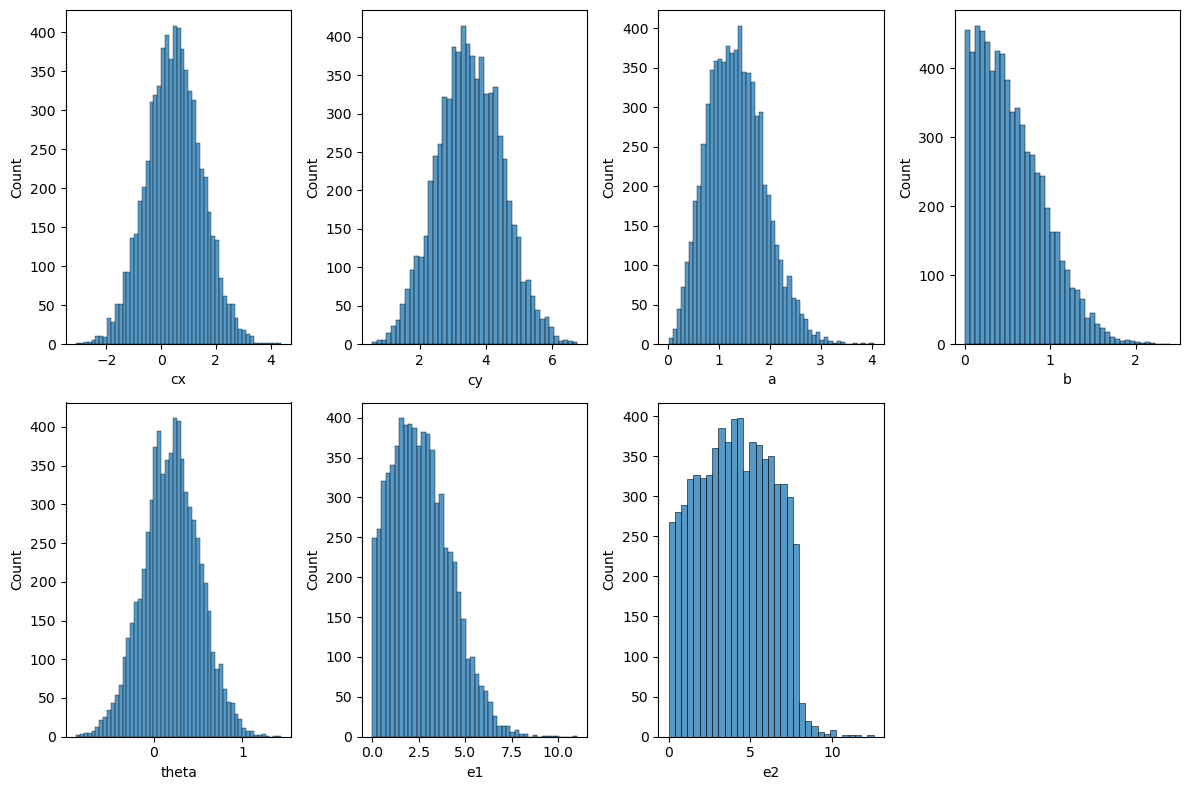

In [8]:
fig, axes = plt.subplots(2, 4, figsize=(12, 8))

axes = axes.flatten()

for i, col in enumerate(df_parameters.columns[:-1]):
    sns.histplot(df_parameters[col], ax=axes[i])
    #axes[i].set_title(col)

axes[-1].axis('off')
plt.tight_layout()
plt.show()

## Visualizing training data

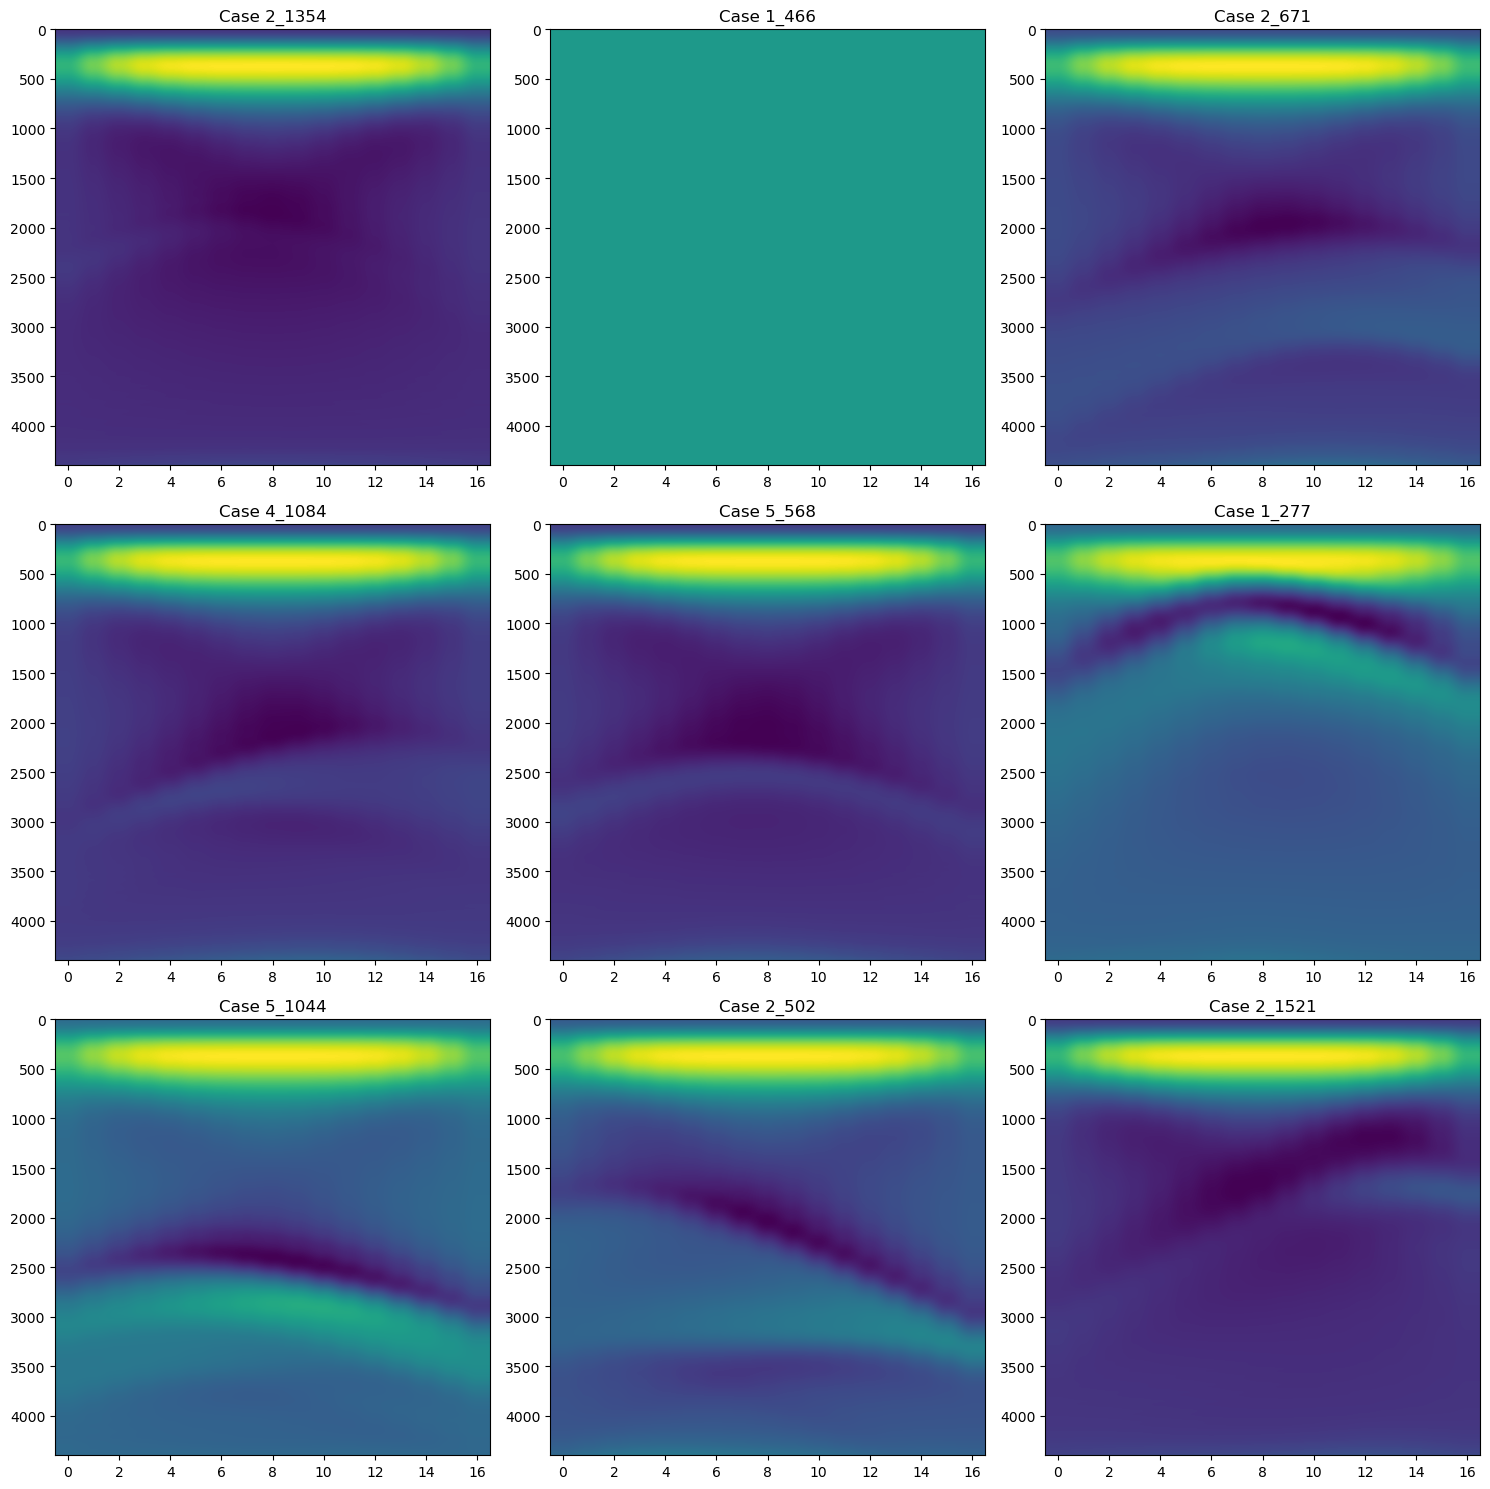

In [9]:
n = 9
idx_viz = []
for i in range(n):
    idx_1 = random.randint(1,5)
    idx_2 = random.randint(1,2000)
    while (idx_1, idx_2) in idx_discard:
        idx_1 = random.randint(1,5)
        idx_2 = random.randint(1,2000)
    idx_viz.append((idx_1,idx_2))

visualize(idx_viz, parameters, cols = 3)

## Preprocessing

In [10]:
X = pd.DataFrame(df_parameters['data_index'])
y = df_parameters.drop(['data_index'], axis=1)

In [11]:
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle = True, random_state=0)
X.loc[:, 'fold'] = -1
y.loc[:, 'fold'] = -1

In [12]:
for fold_ , (train_, valid_) in enumerate(mskf.split(X=X, y=y)):
    X.loc[valid_, 'fold'] = fold_
    y.loc[valid_, 'fold'] = fold_

------------- FOLD 0 -------------
        count      mean       std       min       50%        max
cx     1413.0  0.456686  1.005695 -2.693094  0.440875   3.850254
cy     1413.0  3.541710  0.976681  0.760713  3.541606   6.572892
a      1413.0  1.363908  0.564004  0.032099  1.336455   3.642976
b      1413.0  0.570668  0.400533  0.001272  0.504143   2.397364
theta  1413.0  0.190032  0.308355 -0.776192  0.199877   1.116455
e1     1413.0  2.603378  1.582676  0.000006  2.479386   9.153356
e2     1413.0  4.129745  2.175455  0.007117  4.099518  11.511838
fold   1413.0  0.000000  0.000000  0.000000  0.000000   0.000000


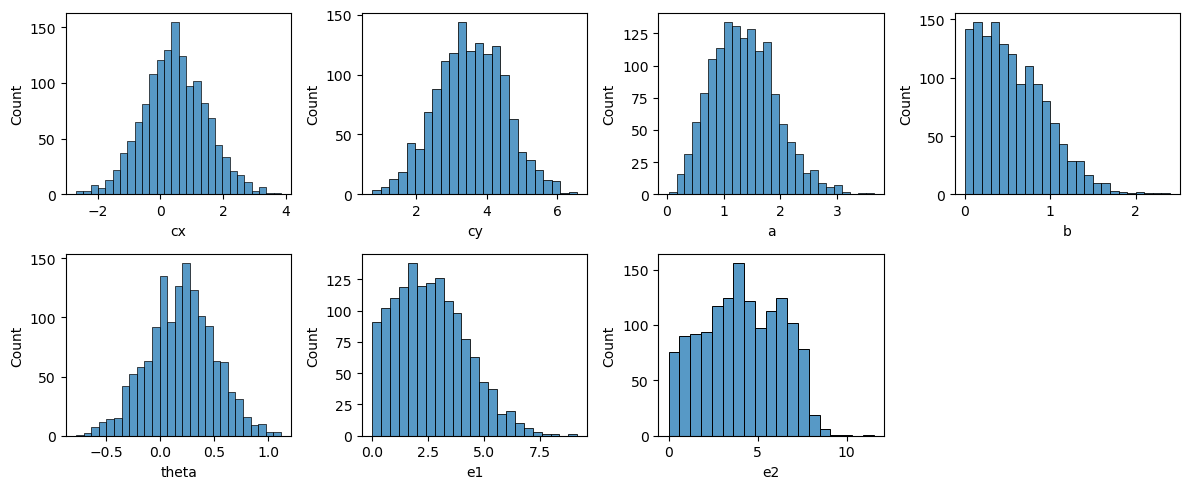

------------- FOLD 1 -------------
        count      mean       std       min       50%        max
cx     1413.0  0.529271  1.004220 -2.808958  0.516654   4.378377
cy     1413.0  3.557955  0.977457  0.572812  3.552514   6.764944
a      1413.0  1.337812  0.558281  0.042182  1.308056   3.702683
b      1413.0  0.528310  0.378525  0.000054  0.467125   2.204865
theta  1413.0  0.203845  0.323689 -0.876184  0.202045   1.435599
e1     1413.0  2.644200  1.603111  0.009311  2.522231   8.093684
e2     1413.0  4.131738  2.304615  0.002443  4.132792  12.517647
fold   1413.0  1.000000  0.000000  1.000000  1.000000   1.000000


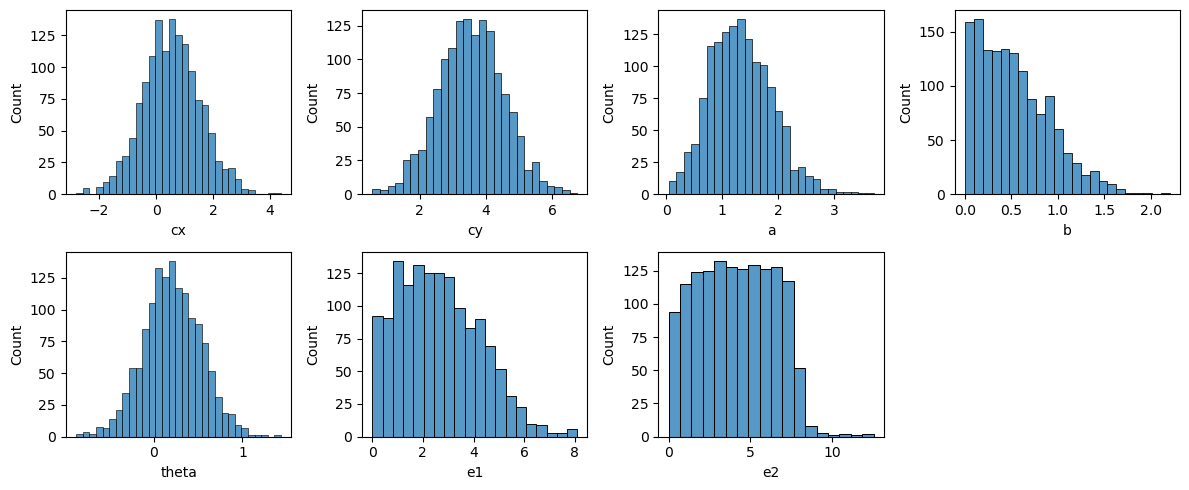

------------- FOLD 2 -------------
        count      mean       std       min       50%        max
cx     1414.0  0.436835  1.023801 -2.694752  0.429320   4.138670
cy     1414.0  3.510326  0.962572  0.928223  3.497641   6.557892
a      1414.0  1.327760  0.564252  0.060661  1.297832   4.032865
b      1414.0  0.547357  0.400840  0.000700  0.484464   2.125607
theta  1414.0  0.205917  0.316596 -0.786606  0.206959   1.244875
e1     1414.0  2.627348  1.599577  0.004380  2.471077   8.250075
e2     1414.0  4.039588  2.264230  0.001778  4.063326  10.236425
fold   1414.0  2.000000  0.000000  2.000000  2.000000   2.000000


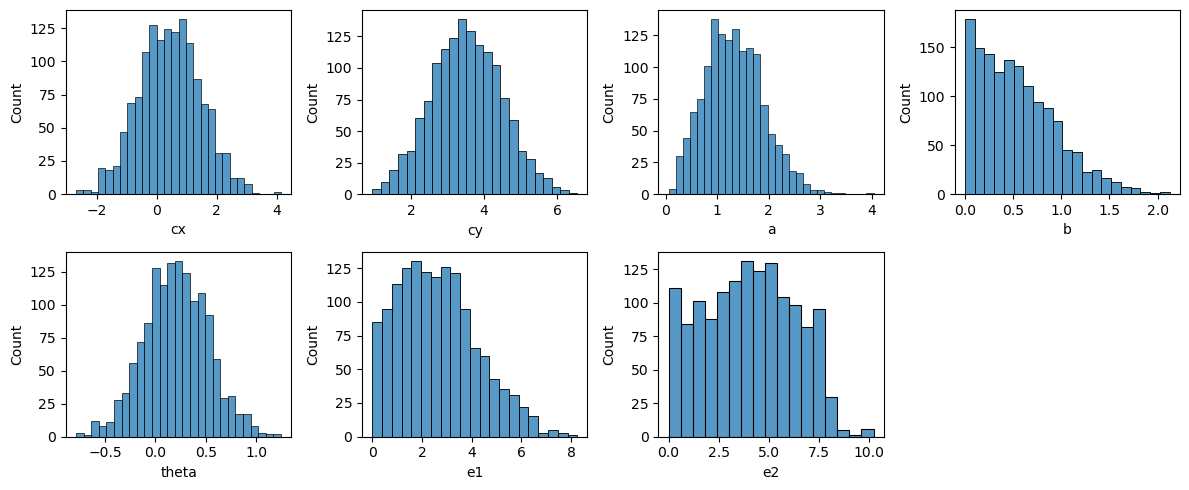

------------- FOLD 3 -------------
        count      mean       std       min       50%        max
cx     1413.0  0.505156  1.010878 -2.835535  0.517901   4.133649
cy     1413.0  3.543774  0.971977  0.770363  3.512714   6.550426
a      1413.0  1.338880  0.568626  0.069034  1.318807   3.851698
b      1413.0  0.536530  0.377061  0.003625  0.460898   1.988845
theta  1413.0  0.193287  0.314666 -0.835219  0.196210   1.373240
e1     1413.0  2.603013  1.553319  0.003543  2.459235  10.031247
e2     1413.0  4.083084  2.242048  0.001369  4.075919  10.819757
fold   1413.0  3.000000  0.000000  3.000000  3.000000   3.000000


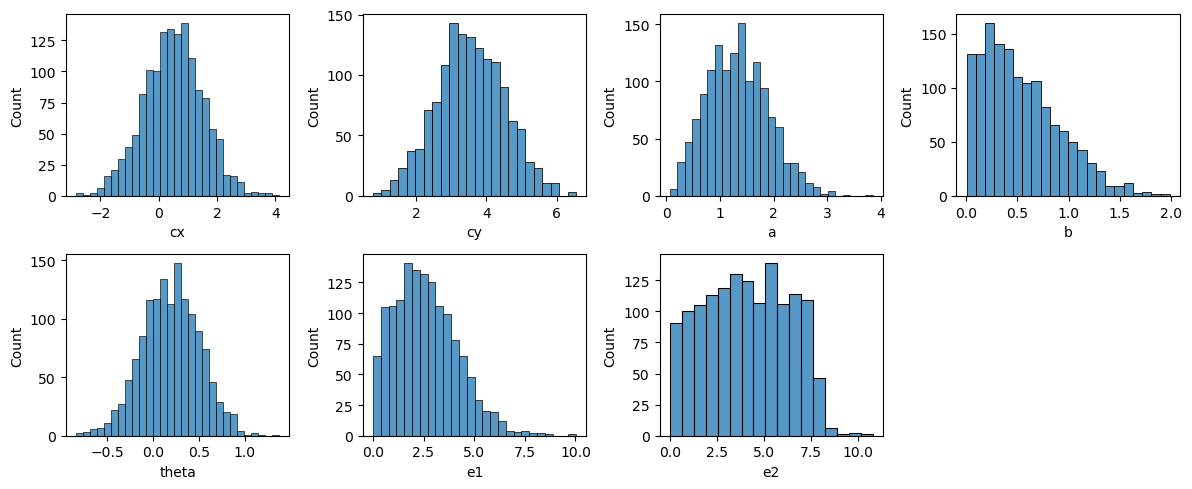

------------- FOLD 4 -------------
        count      mean       std       min       50%        max
cx     1414.0  0.448921  0.993525 -3.102034  0.451723   3.869413
cy     1414.0  3.467774  0.987364  1.044312  3.412576   6.681080
a      1414.0  1.329632  0.556074  0.015081  1.312205   3.364737
b      1414.0  0.548116  0.382435  0.000130  0.474765   2.097634
theta  1414.0  0.206682  0.320790 -0.828643  0.210084   1.297448
e1     1414.0  2.606651  1.601012  0.000099  2.428990  11.031250
e2     1414.0  3.992293  2.225184  0.000887  3.934683  11.214868
fold   1414.0  4.000000  0.000000  4.000000  4.000000   4.000000


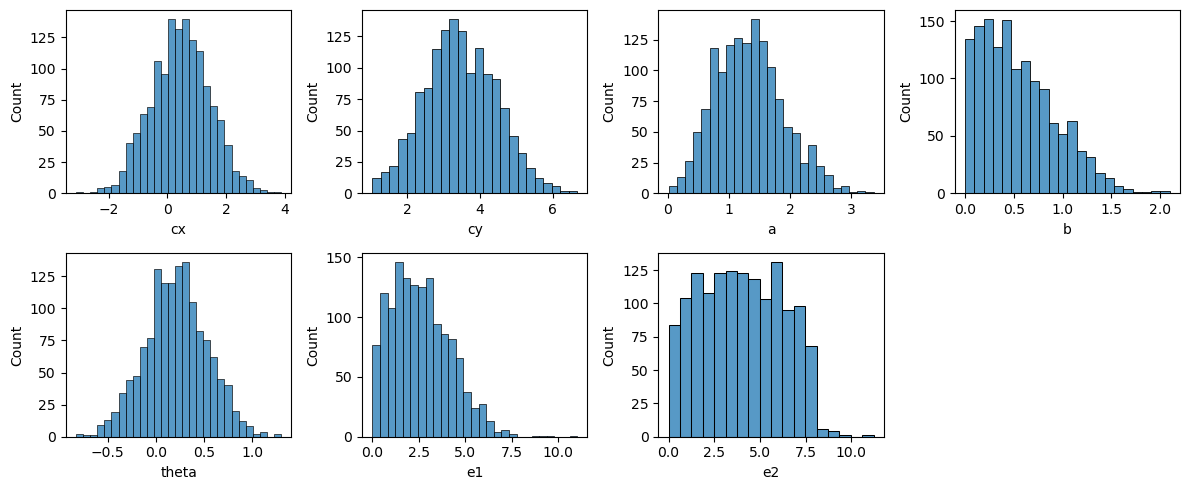

In [13]:
show_distribution = True

for i in range(5):
    print(f'------------- FOLD {i} -------------')
    params = y[y['fold'] == i]
    print(params.describe().drop(['25%','75%']).transpose())
    if show_distribution:
        fig, axes = plt.subplots(2, 4, figsize=(12, 5))

        axes = axes.flatten()

        for i, col in enumerate(params.columns[:-1]):
            sns.histplot(params[col], ax=axes[i])
            #axes[i].set_title(col)

        axes[-1].axis('off')
        plt.tight_layout()
        plt.show()

In [14]:
X_train = X[(X['fold'] == 0) | (X['fold'] == 1) | (X['fold'] == 2)]
y_train = y[(y['fold'] == 0) | (y['fold'] == 1) | (y['fold'] == 2)]

X_validation = X[X['fold'] == 3]
y_validation = y[y['fold'] == 3]

X_test = X[X['fold'] == 4]
y_test = y[y['fold'] == 4]

In [15]:
y_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cx,4240.0,0.474255,1.011823,-2.808958,-0.199689,0.462137,1.151251,4.378377
cy,4240.0,3.536658,0.972230,0.572812,2.860236,3.530865,4.213530,6.764944
a,4240.0,1.343156,0.562260,0.032099,0.930449,1.312285,1.714704,4.032865
b,4240.0,0.548778,0.393728,0.000054,0.226134,0.485447,0.805742,2.397364
theta,4240.0,0.199933,0.316280,-0.876184,-0.005388,0.202034,0.416897,1.435599
e1,4240.0,2.624976,1.594859,0.000006,1.365120,2.481278,3.693233,9.153356
e2,4240.0,4.100343,2.248631,0.001778,2.266159,4.100866,5.932898,12.517647
fold,4240.0,1.000236,0.816641,0.000000,0.000000,1.000000,2.000000,2.000000


In [16]:
y_validation.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cx,1413.0,0.505156,1.010878,-2.835535,-0.180108,0.517901,1.176406,4.133649
cy,1413.0,3.543774,0.971977,0.770363,2.864225,3.512714,4.241118,6.550426
a,1413.0,1.338880,0.568626,0.069034,0.919685,1.318807,1.718257,3.851698
b,1413.0,0.536530,0.377061,0.003625,0.234161,0.460898,0.757611,1.988845
theta,1413.0,0.193287,0.314666,-0.835219,-0.021412,0.196210,0.408292,1.373240
e1,1413.0,2.603013,1.553319,0.003543,1.425457,2.459235,3.621491,10.031247
e2,1413.0,4.083084,2.242048,0.001369,2.256894,4.075919,5.922602,10.819757
fold,1413.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [17]:
y_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cx,1414.0,0.448921,0.993525,-3.102034,-0.238454,0.451723,1.129892,3.869413
cy,1414.0,3.467774,0.987364,1.044312,2.798078,3.412576,4.159281,6.681080
a,1414.0,1.329632,0.556074,0.015081,0.909463,1.312205,1.674190,3.364737
b,1414.0,0.548116,0.382435,0.000130,0.238687,0.474765,0.786354,2.097634
theta,1414.0,0.206682,0.320790,-0.828643,-0.001678,0.210084,0.415901,1.297448
e1,1414.0,2.606651,1.601012,0.000099,1.338517,2.428990,3.667563,11.031250
e2,1414.0,3.992293,2.225184,0.000887,2.149430,3.934683,5.806724,11.214868
fold,1414.0,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [31]:
save_indexes(X_train['data_index'], './utils/train.txt')
save_indexes(X_validation['data_index'], './utils/validation.txt')
save_indexes(X_test['data_index'], './utils/test.txt')